In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
file_path =r"C:\Users\mr266\Downloads\archive\AirPassengers.csv"

df = pd.read_csv(file_path)
df.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.index = pd.date_range(start='1949-01', periods=len(df), freq='M')
df.rename(columns={'#Passengers': 'passengers'}, inplace=True)
df.head()


C:\Users\mr266\AppData\Local\Temp\ipykernel_17988\2168598508.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.index = pd.date_range(start='1949-01', periods=len(df), freq='M')


,passengers
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


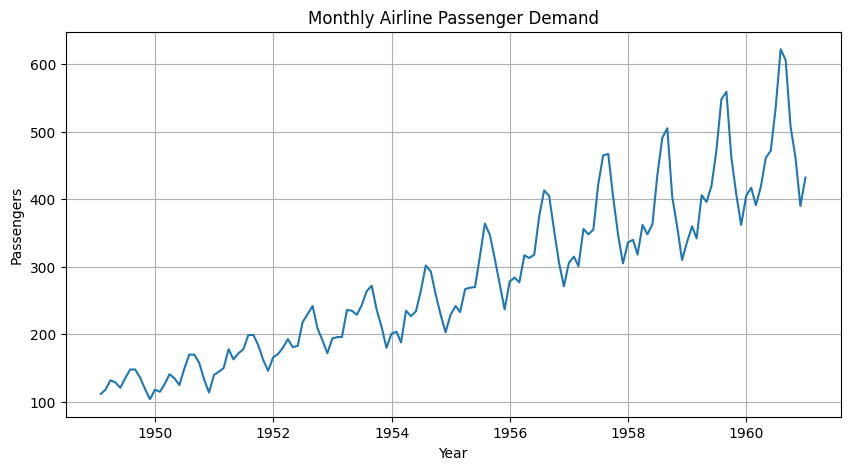

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df['passengers'])
plt.title("Monthly Airline Passenger Demand")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.grid()
plt.show()


In [8]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

adf_test(df['passengers'])


ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


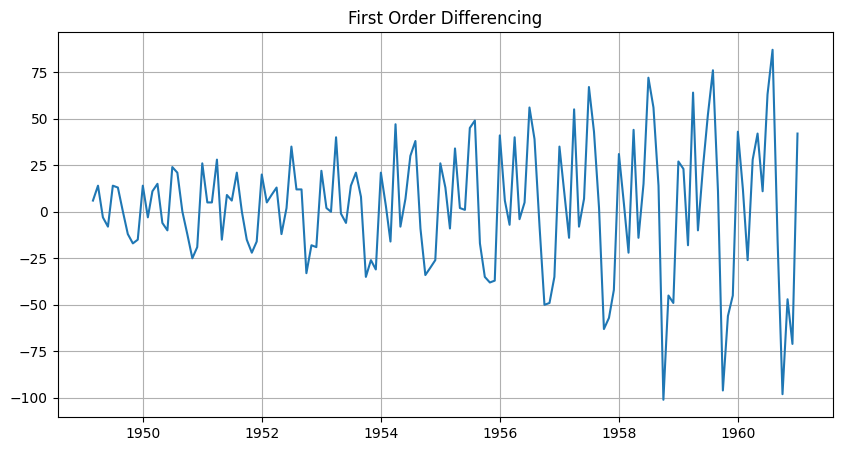

In [9]:
df['diff'] = df['passengers'].diff()

plt.figure(figsize=(10,5))
plt.plot(df['diff'])
plt.title("First Order Differencing")
plt.grid()
plt.show()


In [10]:
adf_test(df['diff'].dropna())


ADF Statistic: -2.8292668241699994
p-value: 0.0542132902838255


In [ ]:
plot_acf(df['diff'].dropna(), lags=20)
plt.show()

plot_pacf(df['diff'].dropna(), lags=20)
plt.show()
